# LBW Übung 6 - MUSTERLÖSUNG - Christensen-Versagenshypothese

Die Christensen Versagenshypothese besteht aus einem Invariantenkriterium

$$
\left( \frac1T -\frac1C  \right) \left( \sigma_1 + \sigma_2 + \sigma_3 \right) + \frac{1}{2TC}  \left( \left( \sigma_1 - \sigma_2  \right)^2 +
        	\left( \sigma_2 - \sigma_3  \right)^2 +
        	\left( \sigma_3 - \sigma_1  \right)^2  \right) - 1 = 0
$$

und einem Bruchkriterium

$$
\max \sigma_i < T \text{ für } \frac{T}{C} < \frac12.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 6.1 Hauptspannungen ermitteln

Erstellen Sie eine Funktion, die für einen gegebenen Spannungstensor die Hauptspannungen als Liste zurückgibt und testen Sie die Funktion mit den 3 gegebenen Beispielspannungstensoren

In [2]:
# Beispielspannungstensoren
# Spannungstensor 1
sigma1 = np.array([[40, 0, 30],
                   [0, 0, 0],
                   [30, 0, 120]])

# Spannungstensor 2
sigma2 = np.array([[70, 70, 60],
                   [70, 75.5, 70],
                   [60, 70, 70]])

# Spannungstensor 3
sigma3 = np.array([[50, 30, 0],
                   [30, 0, 120],
                   [0, 120, 20]])

In [3]:
def calc_hauptspannungen(sigma):
    """
    Berechnet die Hauptspannungen eines Spannungstensors.
    :param sigma: Spannungstensor (3x3)
    :return: Hauptspannungen (1D-Array)
    """
    # Eigenwerte des Spannungstensors berechnen
    eigenvalues, _ = np.linalg.eig(sigma)
    return eigenvalues

eig1 = calc_hauptspannungen(sigma1)
eig2 = calc_hauptspannungen(sigma2)
eig3 = calc_hauptspannungen(sigma3)
print("Hauptspannungen für Spannungstensor 1:", eig1)
print("Hauptspannungen für Spannungstensor 2:", eig2)
print("Hauptspannungen für Spannungstensor 3:", eig3)

Hauptspannungen für Spannungstensor 1: [ 30. 130.   0.]
Hauptspannungen für Spannungstensor 2: [2.05426981e+02 1.00000000e+01 7.30186459e-02]
Hauptspannungen für Spannungstensor 3: [-113.42929531   48.06466613  135.36462919]


## Aufgabe 6.2: von Mises Vergleichsspannung

Erstellen Sie eine Funktion, die für einen beliebigen Spannungstensor die von Mises Vergleichsspannung ermittelt und ermitteln Sie die von Mises Vergleichsspannungen für die 3 oben gegebenen Beispielspannungstensoren.

In [4]:
def calc_vonMises(sigma):
    """
    Berechnet die von Mises Spannung.
    :param sigma: Spannungstensor (3x3)
    :return: von Mises Spannung
    """
    # Hauptspannungen berechnen
    eig = calc_hauptspannungen(sigma)
    
    # von Mises Spannung berechnen
    von_mises = np.sqrt(0.5 * ((eig[0] - eig[1])**2 + (eig[1] - eig[2])**2 + (eig[2] - eig[0])**2))
    
    return von_mises

In [5]:
vm1 = calc_vonMises(sigma1)
vm2 = calc_vonMises(sigma2)
vm3 = calc_vonMises(sigma3)
print("von Mises Spannung für Spannungstensor 1:", vm1)
print("von Mises Spannung für Spannungstensor 2:", vm2)
print("von Mises Spannung für Spannungstensor 3:", vm3)

von Mises Spannung für Spannungstensor 1: 117.89826122551597
von Mises Spannung für Spannungstensor 2: 200.57479901523038
von Mises Spannung für Spannungstensor 3: 218.63211109075442


## Aufgabe 6.3 Darstellen der Christensen Versagenshypothese

a) Erstellen Sie ein Diagramm, in dem die Christensen Versagenshypothese für ebene Spannungszustände für verschiedene T/C-Verhältnisse dargestellt wird. Für eine bessere Vergleichbarkeit ist die Zugfestigkeit dabei konstant.

b) Warum ergeben sich in a) Ellipsen, wenn das Kriterium vom Lode-Winkel unabhängig
ist und einen Kreis auf der π-Ebene darstellt?

c) Zeigen Sie visuell, dass das Bruchkriterium für $\frac{T}{C} = \frac{1}{2}$ tangential auf dem Invariantenkriterium liegt.

### a) 

In [6]:
T = 1
C_list = [1, 4/3, 2, 10/3, 10]

x = np.linspace(-7, 2.1, 1000)
y = x
X, Y = np.meshgrid(x, y)

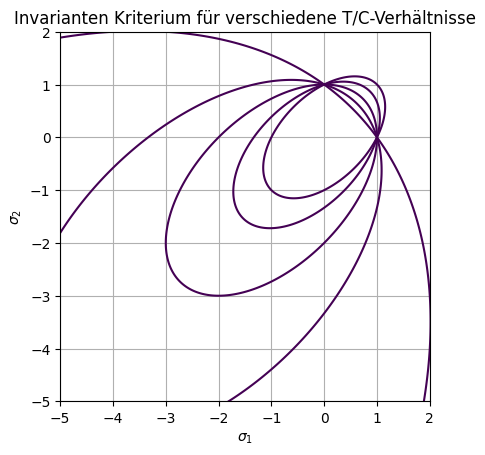

In [7]:
for i in range(len(C_list)):
    C = C_list[i]
    F = (1/T - 1/C) * (X + Y) + 1/(2*T*C) * ((X-Y)**2 + X**2 + Y**2) -1
    plt.contour(X, Y, F, levels=[0])
plt.xlim(-5, 2)
plt.ylim(-5, 2)
plt.xlabel(r'$\sigma_1$')
plt.ylabel(r'$\sigma_2$')
plt.grid()
plt.title(r'Invarianten Kriterium für verschiedene T/C-Verhältnisse')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### b)

Die dargestellten Ellipsen liegen nicht wie π-Ebenen senkrecht zur hydrostatischen Achse sondern auf der σ1-σ2-Ebene. Der Fall T /C = 1 bildet bspw. den
Von-Mises-Versagenskörper, einen räumlich schräg stehenden Zylinder, ab. Während ein Schnitt senkrecht zur hydrostatischen Achse eine kreisförmige π-Ebene
ergäbe, ergibt sich aufgrund der Schrägstellung zur σ1-σ2-Ebene beim Schnitt mit dieser eine Ellipse.

### c)

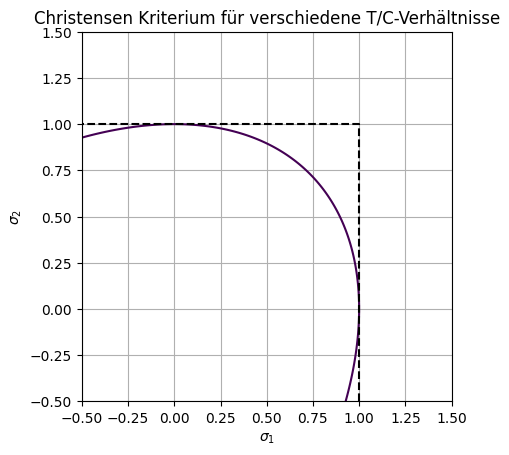

In [8]:
C = 2
F = (1/T - 1/C) * (X + Y) + 1/(2*T*C) * ((X-Y)**2 + X**2 + Y**2) -1
plt.contour(X, Y, F, levels=[0])

fracture_x = [-5,1,1]
fracture_y = [1,1,-5]
plt.plot(fracture_x, fracture_y, 'k--', label='Bruchlinie')
plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1.5)
plt.xlabel(r'$\sigma_1$')
plt.ylabel(r'$\sigma_2$')
plt.grid()
plt.title(r'Christensen Kriterium für verschiedene T/C-Verhältnisse')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Aufgabe 6.4: Auswertung des Christensen Kriteriums

a) Werten Sie die drei gegebenen Spannungszustände wahlweise analytisch oder visuell für einen Werkstoff mit einer Zugfestigkeit von 170 MPa und einer Druckfestigkeit von 230 MPa aus.

b) Berechnen Sie für den hydrostatischen Spannungszustand $( \sigma_1 = \sigma_2 = \sigma_3 = \sigma^0)$ die kritische Spannung $\sigma^0_{c}$ nach der Christensen Versagenshypothese sowohl für $T/C = 1$ als auch für $T/C = \frac{3}{4}$ versagt:

c) Berechnen Sie für den equibiaxialen Zugzustand $( \sigma_1 = \sigma_2 = \sigma^0,   \sigma_3 = 0 )$ die kritische Spannung $\sigma^0_{c}$ nach der Christensen Versagenshypothese sowohl für $T/C = 1$ als auch für $T/C = \frac{3}{4}$ versagt:

### a) 

Der erste Spannungszustand ist ein ebener Spannungszustand, daher lässt er sich gut visuell auswerten, dafür plotten wir noch ein Diagramm für $T=170, C = 230$ als _contourplot_ und den ebenen Spannungszustand $\sigma_1 = 130$ MPa, $\sigma_2 = 30$ MPa. Auch der zweite Spannungszustand ist nahe an einem ebenen Spannungszustand, daher verwenden wir auch hierfür die visuelle Methode:

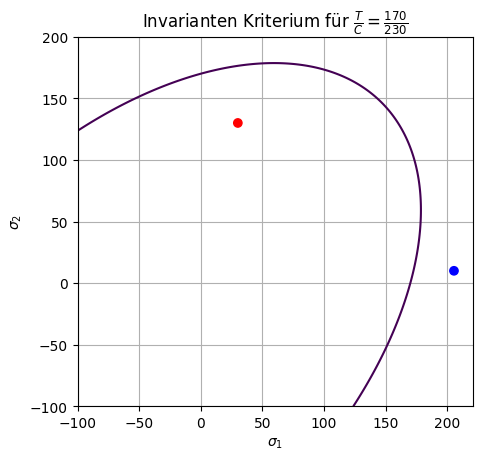

In [9]:
T = 170
C = 230

x = np.linspace(-100, 200, 1000)
y = x
X, Y = np.meshgrid(x, y)

F = (1/T - 1/C) * (X + Y) + 1/(2*T*C) * ((X-Y)**2 + X**2 + Y**2) -1
plt.contour(X, Y, F, levels=[0])
plt.scatter([eig1[0], eig2[0]], [eig1[1], eig2[1]], color=['red', 'blue'])

plt.xlabel(r'$\sigma_1$')
plt.ylabel(r'$\sigma_2$')
plt.grid()
plt.title(r'Invarianten Kriterium für $\frac{T}{C} = \frac{170}{230}$')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Wie die Abbildung zeigt, befindet sich der zum ersten Spannungstensor gehörende Punkt (rot) innerhalb der Versagensfläche, der Werkstoff versagt also nicht. Der blaue Punkt (zweiter Spannungstensor) befindet sich außerhalb der Versagensfläche, der Werkstoff versagt also.

Für den dritten Spannungszustand ließe sich wieder eine ebene parallel zum ebenen Spannungszustand zeichnen und die Schnittansicht des Christensen Kriteriums, sowie den Spannungszustand mit den übrigen Koordinaten einzeichnen, wir ersparen uns aber die Mühe und verwenden den analytischen Ansatz mit 

$$
\left( \frac1T -\frac1C  \right) \left( \sigma_1 + \sigma_2 + \sigma_3 \right) + \frac{1}{2TC}  \left( \left( \sigma_1 - \sigma_2  \right)^2 +
        	\left( \sigma_2 - \sigma_3  \right)^2 +
        	\left( \sigma_3 - \sigma_1  \right)^2  \right) - 1 = 0
$$

Einsetzen ergibt:

In [10]:
links = (1/170 - 1/230) * (eig3[0] + eig3[1] + eig3[2]) + 1/(2*170*230) * ((eig3[0]-eig3[1])**2 + (eig3[1]- eig3[2])**2 + (eig3[2]-eig3[0])**2) - 1

links

np.float64(0.3299232736572886)

Weil die linke Seite größer als die rechte Seite ist, muss die Gleichung zu einem früheren Zeitpunkt (bei der Lastaufbringung) erfüllt gewesen sein. Der Werkstoff ist also bereits versagt.

### b)

Für beide gegeben T/C-Verhältnisse wird das Bruchkriterium nicht berücksichtigt, weil beide $< 0.5$ sind.

Für einen hydrostatischen Spannungszustand ergibt sich:
$$
\left( \frac1T -\frac1C  \right) \left( 3\sigma^0 \right) - 1 = 0
$$

Für $\frac{T}{C} = 1$:
$$
 - 1 = 0
$$
Da diese Gleichung für kein $\sigma^0$ erfüllt ist, gibt es unter dieser Last kein Versagen. Das Christensen Kriterium konvergiert zu dem von Mises Kriterium für $\frac{T}{C} = 1$. Der von Mises Zylinder ist sowohl auf der Zug- als auch auf der Druckseite geöffnet, es tritt also in beiden Fällen kein Versagen auf.

Für $\frac{T}{C} = \frac{3}{4}$:
$$
\frac{1}{4T}  \left( 3\sigma^0_{c}\right) - 1 = 0
$$
$$
\sigma^0_{c} = \frac{4}{3}T
$$
Diese Gleichung hat nur eine Lösung für ein positives $\sigma^0$, für hydrostatische Druckzustände versagt ein Werkstoff nach dem Christensen Kriterium also nicht. Versagen unter hydrostatischem Druck ist beispielsweise vorstellbar für poröse Werkstoffe, diese sind aber ja für das Kriterium ausgeschlossen.

### c)

Für beide gegeben T/C-Verhältnisse wird das Bruchkriterium nicht berücksichtigt, weil beide $< 0.5$ sind.

Für einen equibiaxialen Zugzustand ergibt sich:
$$
\left( \frac1T -\frac1C  \right) \left(2 \sigma^0_{c}\right) + \frac{1}{2TC}  \left( 2(\sigma^0_{c})^2\right) - 1 = 0
$$

Für $\frac{T}{C} = 1$:
$$
\frac{1}{2T^2}  \left( 2(\sigma^0_c)^2\right) - 1 = 0
$$
$$
\sigma^0_c = T
$$

Für $\frac{T}{C} = \frac{3}{4}$:
$$
\left( \frac14 \frac1T  \right) \left(2 \sigma^0_{c}\right) + \frac{3}{8T^2}  \left( 2(\sigma^0_{c})^2\right) - 1 = 0\\
$$
$$
\frac{3}{4T^2}(\sigma^0_c)^2 + \frac{1}{2T} \sigma^0_c - 1= 0\\
$$
$$
(\sigma^0_c)^2 + \frac{2}{3} T\sigma^0_c - \frac{4}{3}T^2= 0\\
$$
$$
\sigma^0_{c 1,2} = \frac{-1 \pm \sqrt{13}}{3}T
$$
Weil für den equibiaxialen **Zugzustand** nur $\sigma^0>0$ berücksichtigt werden, folgt:
$$
\sigma^0_{c} = \frac{-1 + \sqrt{13}}{4}T \approx 0,87 T
$$


Für den hydrostatischen Spannungszustand ergibt sich:
$$
\left( \frac1T -\frac1C  \right) \left( 3\sigma^0 \right) - 1 = 0
$$